# Sklearn task
## Imports and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import RocCurveDisplay, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold

In [2]:
def plot_confusion_matrix(cm):   
    confusion_matrix = [[cm[0,0], cm[1,0]],
                        [cm[0,1], cm[1,1]]]
    
    fig, ax = plt.subplots()
    
    # Plot the confusion matrix as a heatmap
    cax = ax.matshow(confusion_matrix, cmap= "copper")
    
    # Add labels for the matrix values
    for i in range(2):
        for j in range(2):
            plt.text(j, i, confusion_matrix[i][j], va='center', ha='center', color='white', fontsize=14)
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    
    # Add a color bar to the right
    cbar = fig.colorbar(cax)
    # Set the color bar labels
    cbar.set_label('Counts', rotation=270, labelpad=20)
    
    plt.title('Confusion Matrix')
    plt.grid(False)
    plt.show()

## Preprocessing
### NAN-values elimination

In [46]:
df_original = pd.read_csv("heart.csv")
print("The original dataframe has", df_original.shape[0], "rows and", df_original.shape[1], "columns")
df_original.dropna(inplace = True)
df_original.reset_index(inplace = True, drop = True)
print("After dropping NAN values the dataframe has", df_original.shape[0], "rows and", df_original.shape[1], "columns")
df_original

The original dataframe has 1025 rows and 14 columns
After dropping NAN values the dataframe has 1025 rows and 14 columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [47]:
std_scaler = StandardScaler().fit(df_original.iloc[:, :-1])
df_std = std_scaler.transform(df_original.iloc[:, :-1])
df = pd.DataFrame(df_std, columns=df_original.columns[:-1])
df['target'] = df_original['target']

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,1
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,0
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,0
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1


In [49]:
print(df.head(8).to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{rrrrrrrrrrrrrr}
\toprule
age & sex & cp & trestbps & chol & fbs & restecg & thalach & exang & oldpeak & slope & ca & thal & target \\
\midrule
-0.27 & 0.66 & -0.92 & -0.38 & -0.66 & -0.42 & 0.89 & 0.82 & -0.71 & -0.06 & 1.00 & 1.21 & 1.09 & 0 \\
-0.16 & 0.66 & -0.92 & 0.48 & -0.83 & 2.39 & -1.00 & 0.26 & 1.40 & 1.73 & -2.24 & -0.73 & 1.09 & 0 \\
1.72 & 0.66 & -0.92 & 0.76 & -1.40 & -0.42 & 0.89 & -1.05 & 1.40 & 1.30 & -2.24 & -0.73 & 1.09 & 0 \\
0.72 & 0.66 & -0.92 & 0.94 & -0.83 & -0.42 & 0.89 & 0.52 & -0.71 & -0.91 & 1.00 & 0.24 & 1.09 & 0 \\
0.83 & -1.51 & -0.92 & 0.36 & 0.93 & 2.39 & 0.89 & -1.87 & -0.71 & 0.71 & -0.62 & 2.18 & -0.52 & 0 \\
0.39 & -1.51 & -0.92 & -1.81 & 0.04 & -0.42 & -1.00 & -1.18 & -0.71 & -0.06 & -0.62 & -0.73 & -0.52 & 1 \\
0.39 & 0.66 & -0.92 & -1.01 & 1.40 & -0.42 & 2.79 & -0.40 & -0.71 & 2.83 & -2.24 & 2.18 & -2.13 & 0 \\
0.06 & 0.66 & -0.92 & 1.62 & 0.83 & -0.42 & -1.00 & -0.18 & 1.40 & -0.23 & -0.62 & 0.24 & 1.09 & 0 \\
\bottomrule
\end{ta

### PCA

In [6]:
pca = PCA()
pca.fit(df)
print(pca.n_components_)
Xpca = pca.transform(df)[:, :14] # Nos quedamos con M=10 PCs
pd.DataFrame(Xpca, columns=[f'PC {i+1}' for i in range(14)]).head(10)

14


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14
0,-0.364548,-1.195770,1.142280,-1.020807,-0.559894,-1.502589,0.071296,0.047578,0.874640,-0.417733,-0.564305,0.353207,-0.118177,-0.316794
1,2.645279,-0.482553,1.178818,1.769173,1.347927,1.526610,1.469502,0.595971,-0.140604,-1.139846,-0.653454,0.858441,0.281266,-0.001894
2,3.084786,-1.233415,-0.715218,1.534785,0.282885,-0.738052,0.378277,-1.394424,-0.849971,-0.446950,-0.516444,0.899361,0.947165,0.029298
3,-0.353287,-0.355681,0.981187,-0.891150,-0.488838,-1.438187,0.385814,-1.567609,0.093209,-0.413257,-1.004132,0.238076,0.339905,-0.407242
4,2.210296,1.985598,-0.390150,0.212537,-2.388316,-0.566165,1.022622,1.680120,0.466561,-0.526379,-0.734804,-1.071859,-0.614257,-0.177208
5,0.058525,-0.060305,-2.042311,-0.315445,-0.588074,1.215393,-1.354282,0.739242,-0.460359,-1.344641,-0.610340,-0.064568,-0.264191,0.335125
6,2.170056,-0.599159,-1.710623,1.411798,-1.452899,-1.886838,-0.322034,2.789231,1.735889,2.633792,-1.387333,0.448504,0.116941,-0.012759
7,1.927117,0.074954,0.644142,-1.096015,1.267144,0.478614,0.423497,-1.119301,0.276424,0.316737,0.118542,-0.544029,0.807964,0.007045
8,-0.442464,-1.138650,0.626505,-1.296110,0.751918,0.540013,-0.601791,-0.186339,-0.240835,-0.665362,-0.850077,-0.441703,-0.974121,-0.412604
9,2.779988,-0.755575,-0.268178,-0.300764,-0.223733,0.937228,-0.876742,0.749271,0.704871,0.981980,0.542444,-0.053068,-0.763930,0.141924


Varianza capturada con M=12 es: 96.3 %


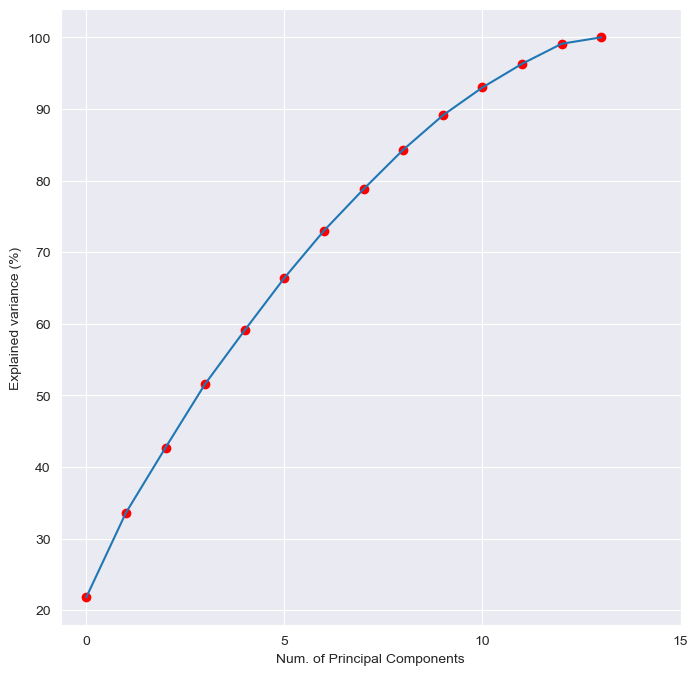

In [7]:
explained_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3) * 100)
print(f'Varianza capturada con M=12 es: {explained_var[11]} %\n')

plt.figure(figsize=(8,8))
plt.plot(explained_var)
plt.scatter(range(len(explained_var)), explained_var, color='r')
plt.xlabel('Num. of Principal Components')
plt.ylabel('Explained variance (%)')
plt.xticks(range(0, 20, 5))
plt.show()

### Save

In [8]:
from sklearn.model_selection import train_test_split

X_total = pd.DataFrame(Xpca[:, :12])
Y_total = df_original['target']

X_train, X_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.33, random_state=13)

df_test = pd.DataFrame(columns=X_test.columns, data=X_test)
df_test['target'] = y_test 

df_train = pd.DataFrame(columns=X_train.columns, data=X_train)
df_train['target'] = y_train

df_train.to_csv("df_train.csv", index = False)
df_test.to_csv("df_test.csv", index = False)
print('Train data shape:', df_train.shape)
print('Test data shape:', df_test.shape)

Train data shape: (686, 13)
Test data shape: (339, 13)


## Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [51]:
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis = 1), training_df["target"]

In [54]:
metrics_mean = pd.DataFrame(columns = ["Threshold", "Accuracy", "F1-Score"])
kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

j = 0
for threshold in [0.5, 0.55, 0.6, 0.65, 0.7]:
    metrics = pd.DataFrame(columns = ["Fold", "Accuracy", "F1-Score"])
    i = 1
    for train, validation in kfolds.split(X, Y):
        naive_bayes_model = GaussianNB()
        naive_bayes_model.fit(X.iloc[train], Y.iloc[train])
    
        y_pred = (naive_bayes_model.predict_proba(X.iloc[validation])[:, 1] >= threshold).astype(int)
        
        metrics.loc[i-1] = {
            "Fold": i,
            "Accuracy": accuracy_score(Y.iloc[validation], y_pred),
            "F1-Score": f1_score(Y.iloc[validation], y_pred)}
        i += 1
        
    metrics_mean.loc[j] = {
        "Threshold": threshold,
        "Accuracy": metrics["Accuracy"].mean(),
        "F1-Score": metrics["F1-Score"].mean()}
    j += 1

metrics_mean

,Threshold,Accuracy,F1-Score
0,0.50,0.850000,0.861490
1,0.55,0.858717,0.867509
2,0.60,0.858632,0.863667
3,0.65,0.842647,0.844449
4,0.70,0.841176,0.836251


In [56]:
print(metrics_mean.to_latex(index = False, float_format="{:.4f}".format))

\begin{tabular}{rrr}
\toprule
Threshold & Accuracy & F1-Score \\
\midrule
0.5000 & 0.8500 & 0.8615 \\
0.5500 & 0.8587 & 0.8675 \\
0.6000 & 0.8586 & 0.8637 \\
0.6500 & 0.8426 & 0.8444 \\
0.7000 & 0.8412 & 0.8363 \\
\bottomrule
\end{tabular}


Accuracy: 0.8289085545722714
F1-score: 0.8370786516853933
Precision: 0.8097826086956522
Recall: 0.8662790697674418


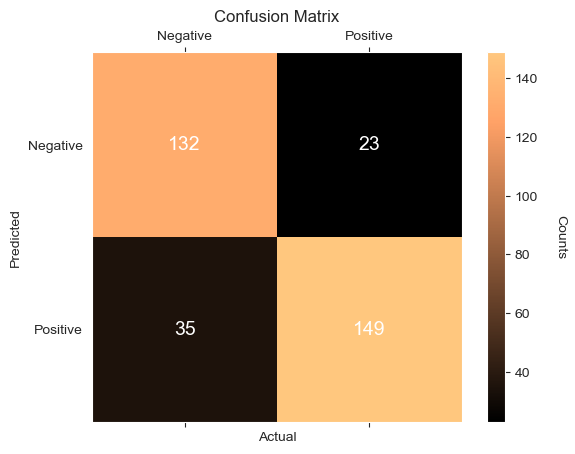

In [57]:
test_df = pd.read_csv("df_test.csv")
X_Test, Y_Test = test_df.drop(["target"], axis = 1), test_df["target"]
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis=1), training_df["target"]

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X, Y)
y_pred = (naive_bayes_model.predict_proba(X_Test)[:, 1] >= 0.55).astype(int)

cm = confusion_matrix(Y_Test, y_pred)

print("Accuracy:", accuracy_score(Y_Test, y_pred))
print("F1-score:", f1_score(Y_Test, y_pred))
print("Precision:", precision_score(Y_Test, y_pred))
print("Recall:", recall_score(Y_Test, y_pred))
plot_confusion_matrix(cm)

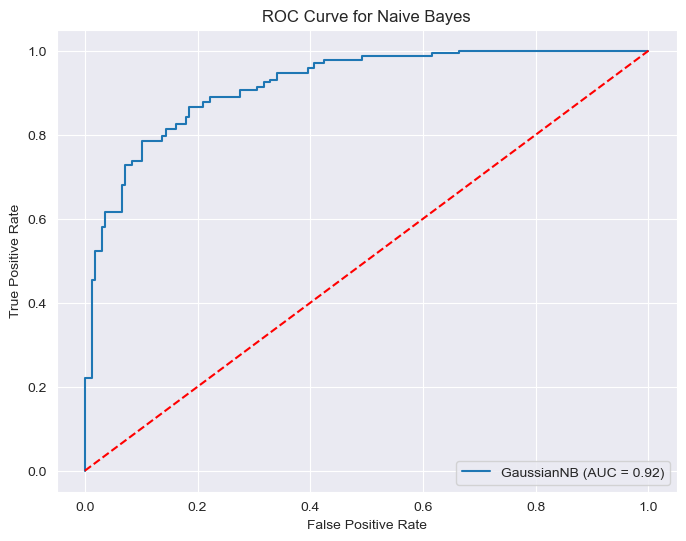

In [13]:
test_df = pd.read_csv("df_test.csv")
X_Test, Y_Test = test_df.drop(["target"], axis = 1), test_df["target"]
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis = 1), training_df["target"]

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X, Y)

_, ax = plt.subplots(figsize=(8,6))
RocCurveDisplay.from_estimator(naive_bayes_model, X_Test, Y_Test, ax=ax)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Decision tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis=1), training_df["target"]

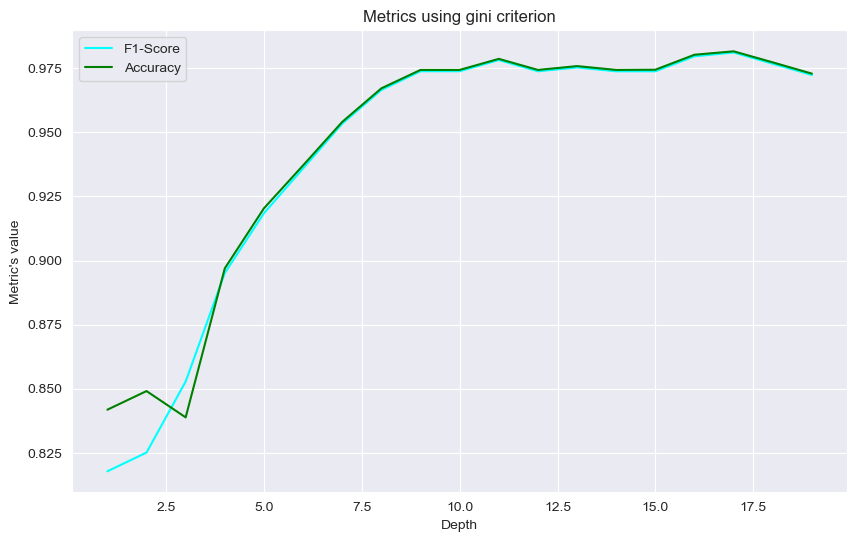

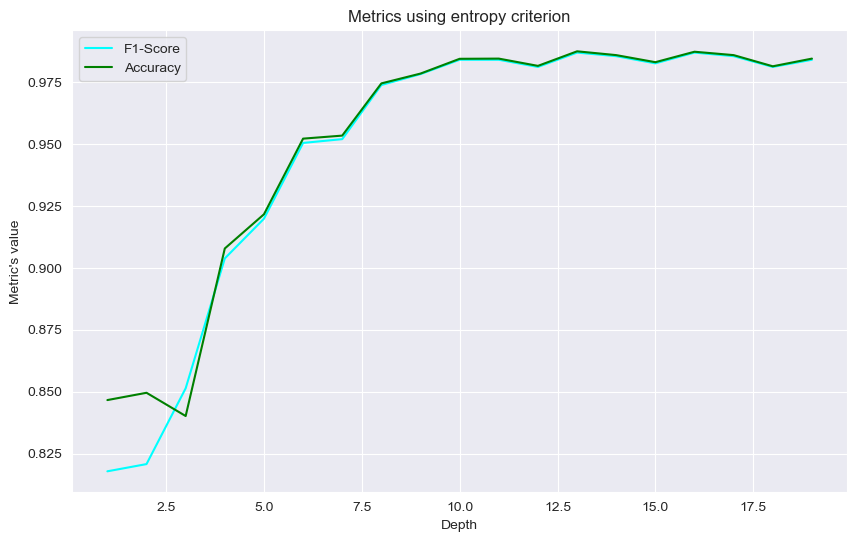

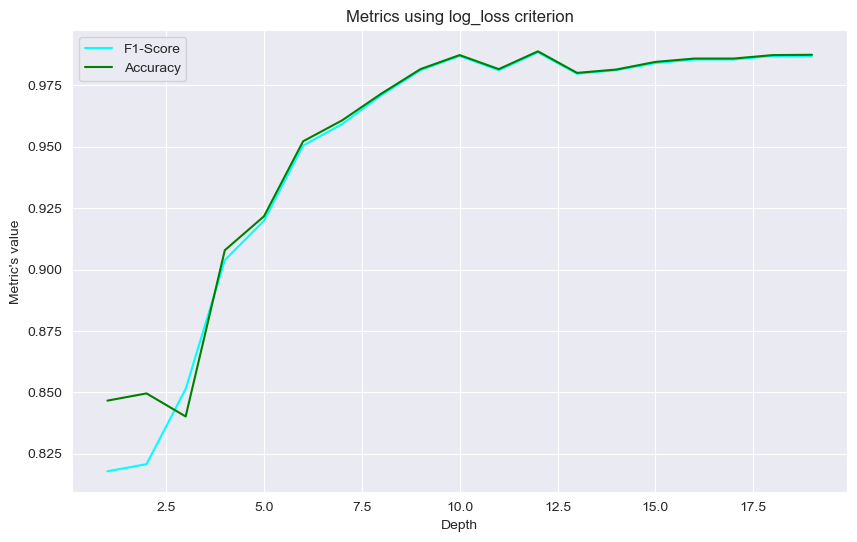

In [5]:
metrics_mean = pd.DataFrame(columns=["Criterion", "Max_depth", "Accuracy", "F1-Score"])
kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

j = 0
for criterion in ['gini', 'entropy', 'log_loss']:
    metrics = pd.DataFrame(columns=["Fold", "Accuracy", "F1-Score"])
    i = 1
    
    fig, ax = plt.subplots(figsize=(10,6))
    accuracies = []
    f1_scores = []
    
    for depth in np.arange(1, 20).tolist():
        
        acc = []
        f1 = []
        
        for train, validation in kfolds.split(X, Y):
            decision_tree_model = DecisionTreeClassifier(criterion=criterion, max_depth=depth)
            decision_tree_model.fit(X.iloc[train], Y.iloc[train])
    
            y_pred = decision_tree_model.predict(X.iloc[validation])

            acc.append(accuracy_score(Y.iloc[validation], y_pred))
            f1.append(f1_score(Y.iloc[validation], y_pred))
    
            metrics.loc[i - 1] = {
                "Fold": i,
                "Accuracy": accuracy_score(Y.iloc[validation], y_pred),
                "F1-Score": f1_score(Y.iloc[validation], y_pred)}
            i += 1
        
        metrics_mean.loc[j] = {
            "Criterion": criterion,
            "Max_depth": depth,
            "Accuracy": metrics["Accuracy"].mean(),
            "F1-Score": metrics["F1-Score"].mean()}
        j += 1
        accuracies.append(np.mean(acc))
        f1_scores.append(np.mean(f1))
        
    ax.plot(range(1,20), accuracies, color = "cyan")
    ax.plot(range(1,20), f1_scores, color = "green")
    ax.set_xlabel('Depth')
    ax.set_ylabel("Metric's value")
    ax.set_title(f'Metrics using {criterion} criterion')
    ax.legend(['F1-Score', 'Accuracy'])

In [6]:
metrics_mean.loc[metrics_mean['Accuracy'].idxmax()]
#metrics_mean.loc[metrics_mean['F1-Score'].idxmax()]

Criterion    log_loss
Max_depth          19
Accuracy     0.948524
F1-Score     0.951701
Name: 56, dtype: object

Accuracy: 0.9528023598820059
F1-score: 0.9540229885057472
Precision: 0.9431818181818182
Recall: 0.9651162790697675


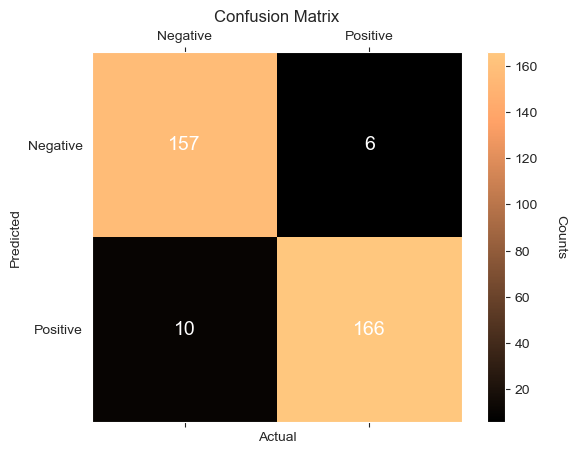

In [7]:
test_df = pd.read_csv("df_test.csv")
X_Test, Y_Test = test_df.drop(["target"], axis = 1), test_df["target"]
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis=1), training_df["target"]

decision_tree_model = DecisionTreeClassifier(criterion='log_loss', max_depth=19)
decision_tree_model.fit(X, Y)
y_pred = decision_tree_model.predict(X_Test)

cm = confusion_matrix(Y_Test, y_pred)

print("Accuracy:", accuracy_score(Y_Test, y_pred))
print("F1-score:", f1_score(Y_Test, y_pred))
print("Precision:", precision_score(Y_Test, y_pred))
print("Recall:", recall_score(Y_Test, y_pred))
plot_confusion_matrix(cm)

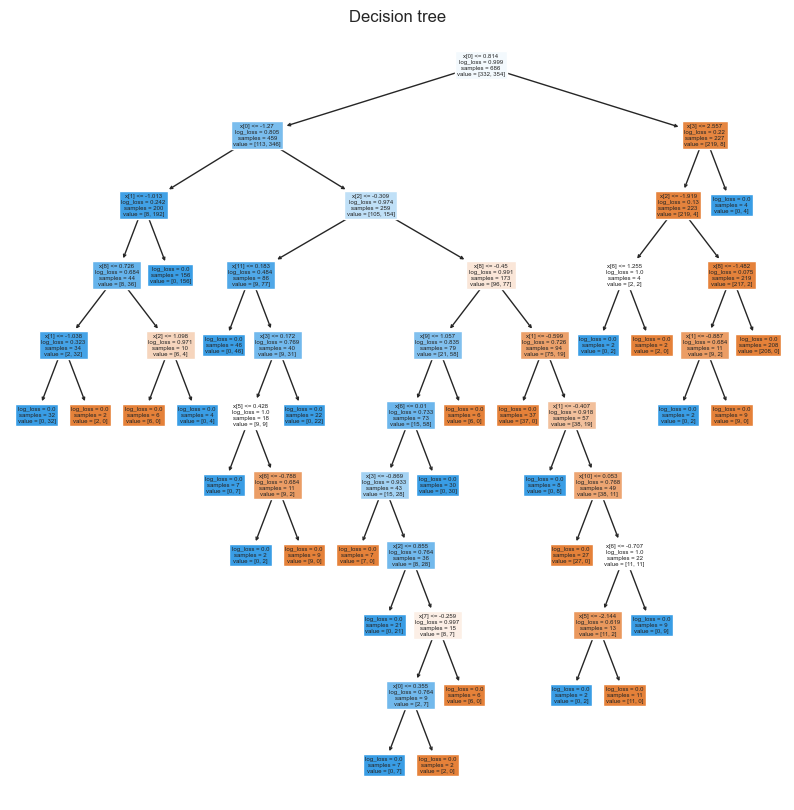

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(decision_tree_model, filled=True)
plt.title("Decision tree")
plt.show()

## Nearest neighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis=1), training_df["target"]
metrics_mean = pd.DataFrame(columns=["K", "Accuracy", "F1-Score"])
kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

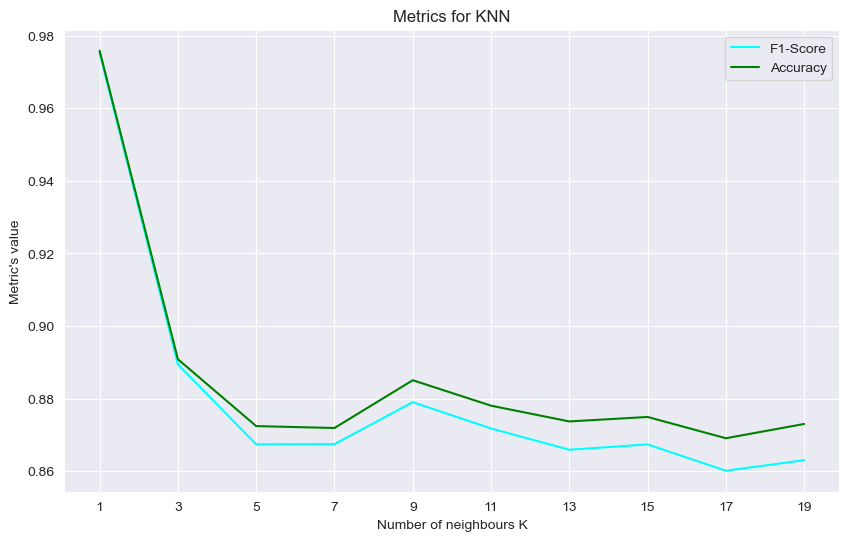

In [59]:
_, ax = plt.subplots(figsize=(10,6))
j = 0

accuracies = []
f1_scores = []

for k in np.arange(1,21,2).tolist():
    metrics = pd.DataFrame(columns=["Fold", "Accuracy", "F1-Score"])

    acc = []
    f1 = []
    
    i = 1
    for train, validation in kfolds.split(X, Y):  
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X.iloc[train], Y.iloc[train])

        y_pred = knn_model.predict(X.iloc[validation])

        acc.append(accuracy_score(Y.iloc[validation], y_pred))
        f1.append(f1_score(Y.iloc[validation], y_pred))

        metrics.loc[i - 1] = {
            "Fold": i,
            "Accuracy": accuracy_score(Y.iloc[validation], y_pred),
            "F1-Score": f1_score(Y.iloc[validation], y_pred)}
        i += 1

    metrics_mean.loc[j] = {
        "K": k,
        "Accuracy": metrics["Accuracy"].mean(),
        "F1-Score": metrics["F1-Score"].mean()}
    j += 1
    accuracies.append(np.mean(acc))
    f1_scores.append(np.mean(f1))

ax.plot(range(1,21,2), accuracies, color = "cyan")
ax.plot(range(1,21,2), f1_scores, color = "green")
ax.set_xlabel('Number of neighbours K')
ax.set_ylabel("Metric's value")
ax.set_title("Metrics for KNN")
ax.legend(['F1-Score', 'Accuracy'])
ax.set_xticks(np.arange(1,21,2))

plt.show()

In [60]:
test_df = pd.read_csv("df_test.csv")
X_Test, Y_Test = test_df.drop(["target"], axis = 1), test_df["target"]
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis=1), training_df["target"]

Accuracy: 0.9616519174041298
F1-score: 0.9629629629629629
Precision: 0.9441340782122905
Recall: 0.9825581395348837


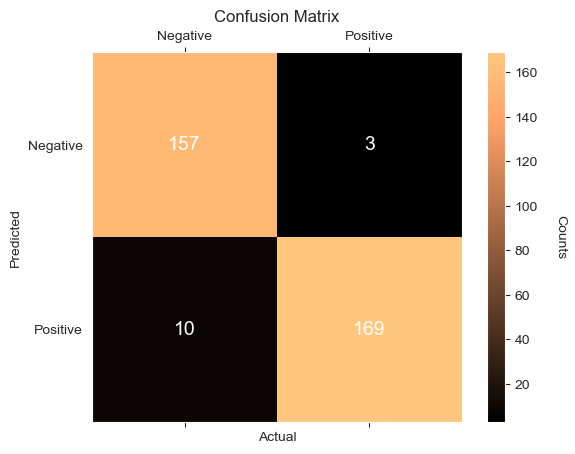

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X, Y)
y_pred = knn_model.predict(X_Test)

cm = confusion_matrix(Y_Test, y_pred)

print("Accuracy:", accuracy_score(Y_Test, y_pred))
print("F1-score:", f1_score(Y_Test, y_pred))
print("Precision:", precision_score(Y_Test, y_pred))
print("Recall:", recall_score(Y_Test, y_pred))
plot_confusion_matrix(cm)

## Support vector machine

In [73]:
from sklearn.svm import SVC
from matplotlib import colors
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis=1), training_df["target"]
metrics_mean = pd.DataFrame(columns=["C", "Kernel", "Degree", "Accuracy", "F1-Score"])
kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

In [74]:
j = 0

accuracies = []
f1_scores = []

C = [0.1, 1, 10, 100]
Kernel = ['linear', 'rbf', 'sigmoid']

for kernel in Kernel:
    for c in C:
        
        metrics = pd.DataFrame(columns=["Fold", "Accuracy", "F1-Score"])
    
        acc = []
        f1 = []
    
        i = 1
        for train, validation in kfolds.split(X, Y):
            svc_model = SVC(C=c, kernel=kernel)
            svc_model.fit(X.iloc[train], Y.iloc[train])
    
            y_pred = svc_model.predict(X.iloc[validation])
    
            acc.append(accuracy_score(Y.iloc[validation], y_pred))
            f1.append(f1_score(Y.iloc[validation], y_pred))
    
            metrics.loc[i - 1] = {
                "Fold": i,
                "Accuracy": accuracy_score(Y.iloc[validation], y_pred),
                "F1-Score": f1_score(Y.iloc[validation], y_pred)}
            i += 1
    
        metrics_mean.loc[j] = {
            "C": c,
            "Kernel": kernel,
            "Degree": -1,
            "Accuracy": metrics["Accuracy"].mean(),
            "F1-Score": metrics["F1-Score"].mean()}
        j += 1
        accuracies.append(np.mean(acc))
        f1_scores.append(np.mean(f1))

In [75]:
kernel = 'poly'
for c in C:
    for degree in [2,3,4,5,6,7,8]:
        metrics = pd.DataFrame(columns=["Fold", "Accuracy", "F1-Score"])
    
        acc = []
        f1 = []
    
        i = 1
        for train, validation in kfolds.split(X, Y):
            svc_model = SVC(C=c, kernel=kernel, degree=degree)
            svc_model.fit(X.iloc[train], Y.iloc[train])
    
            y_pred = svc_model.predict(X.iloc[validation])
    
            acc.append(accuracy_score(Y.iloc[validation], y_pred))
            f1.append(f1_score(Y.iloc[validation], y_pred))
    
            metrics.loc[i - 1] = {
                "Fold": i,
                "Accuracy": accuracy_score(Y.iloc[validation], y_pred),
                "F1-Score": f1_score(Y.iloc[validation], y_pred)}
            i += 1
    
        metrics_mean.loc[j] = {
            "C": c,
            "Kernel": kernel,
            "Degree": degree,
            "Accuracy": metrics["Accuracy"].mean(),
            "F1-Score": metrics["F1-Score"].mean()}
        j += 1
        accuracies.append(np.mean(acc))
        f1_scores.append(np.mean(f1))

In [77]:
#metrics_mean.loc[metrics_mean['Accuracy'].idxmax()]
metrics_mean.loc[metrics_mean['F1-Score'].idxmax()]

C              100.0
Kernel          poly
Degree             5
Accuracy    0.982566
F1-Score    0.982722
Name: 36, dtype: object

Accuracy: 0.9616519174041298
F1-score: 0.9623188405797102
Precision: 0.9595375722543352
Recall: 0.9651162790697675


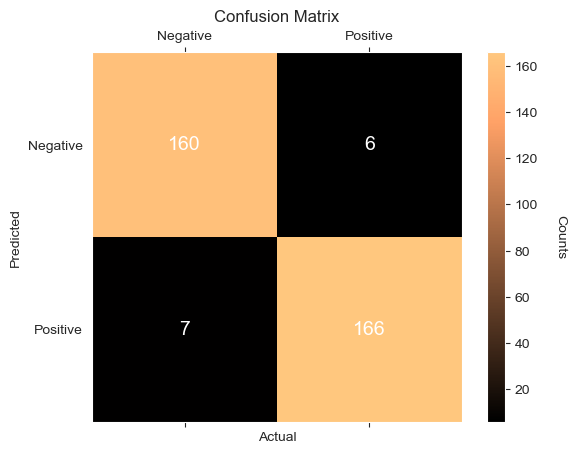

In [79]:
test_df = pd.read_csv("df_test.csv")
X_Test, Y_Test = test_df.drop(["target"], axis = 1), test_df["target"]
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis=1), training_df["target"]

svc_model = SVC(C=100, kernel='poly', degree=5)
svc_model.fit(X, Y)
y_pred = svc_model.predict(X_Test)

cm = confusion_matrix(Y_Test, y_pred)

print("Accuracy:", accuracy_score(Y_Test, y_pred))
print("F1-score:", f1_score(Y_Test, y_pred))
print("Precision:", precision_score(Y_Test, y_pred))
print("Recall:", recall_score(Y_Test, y_pred))
plot_confusion_matrix(cm)

C:\Users\Gonzalo_MA\anaconda3\envs\IS_Enviroment\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gonzalo_MA\anaconda3\envs\IS_Enviroment\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gonzalo_MA\anaconda3\envs\IS_Enviroment\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gonzalo_MA\anaconda3\envs\IS_Enviroment\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gonzalo_MA\anaconda3\envs\IS_Enviroment\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gonzalo_MA\anaconda3\envs\

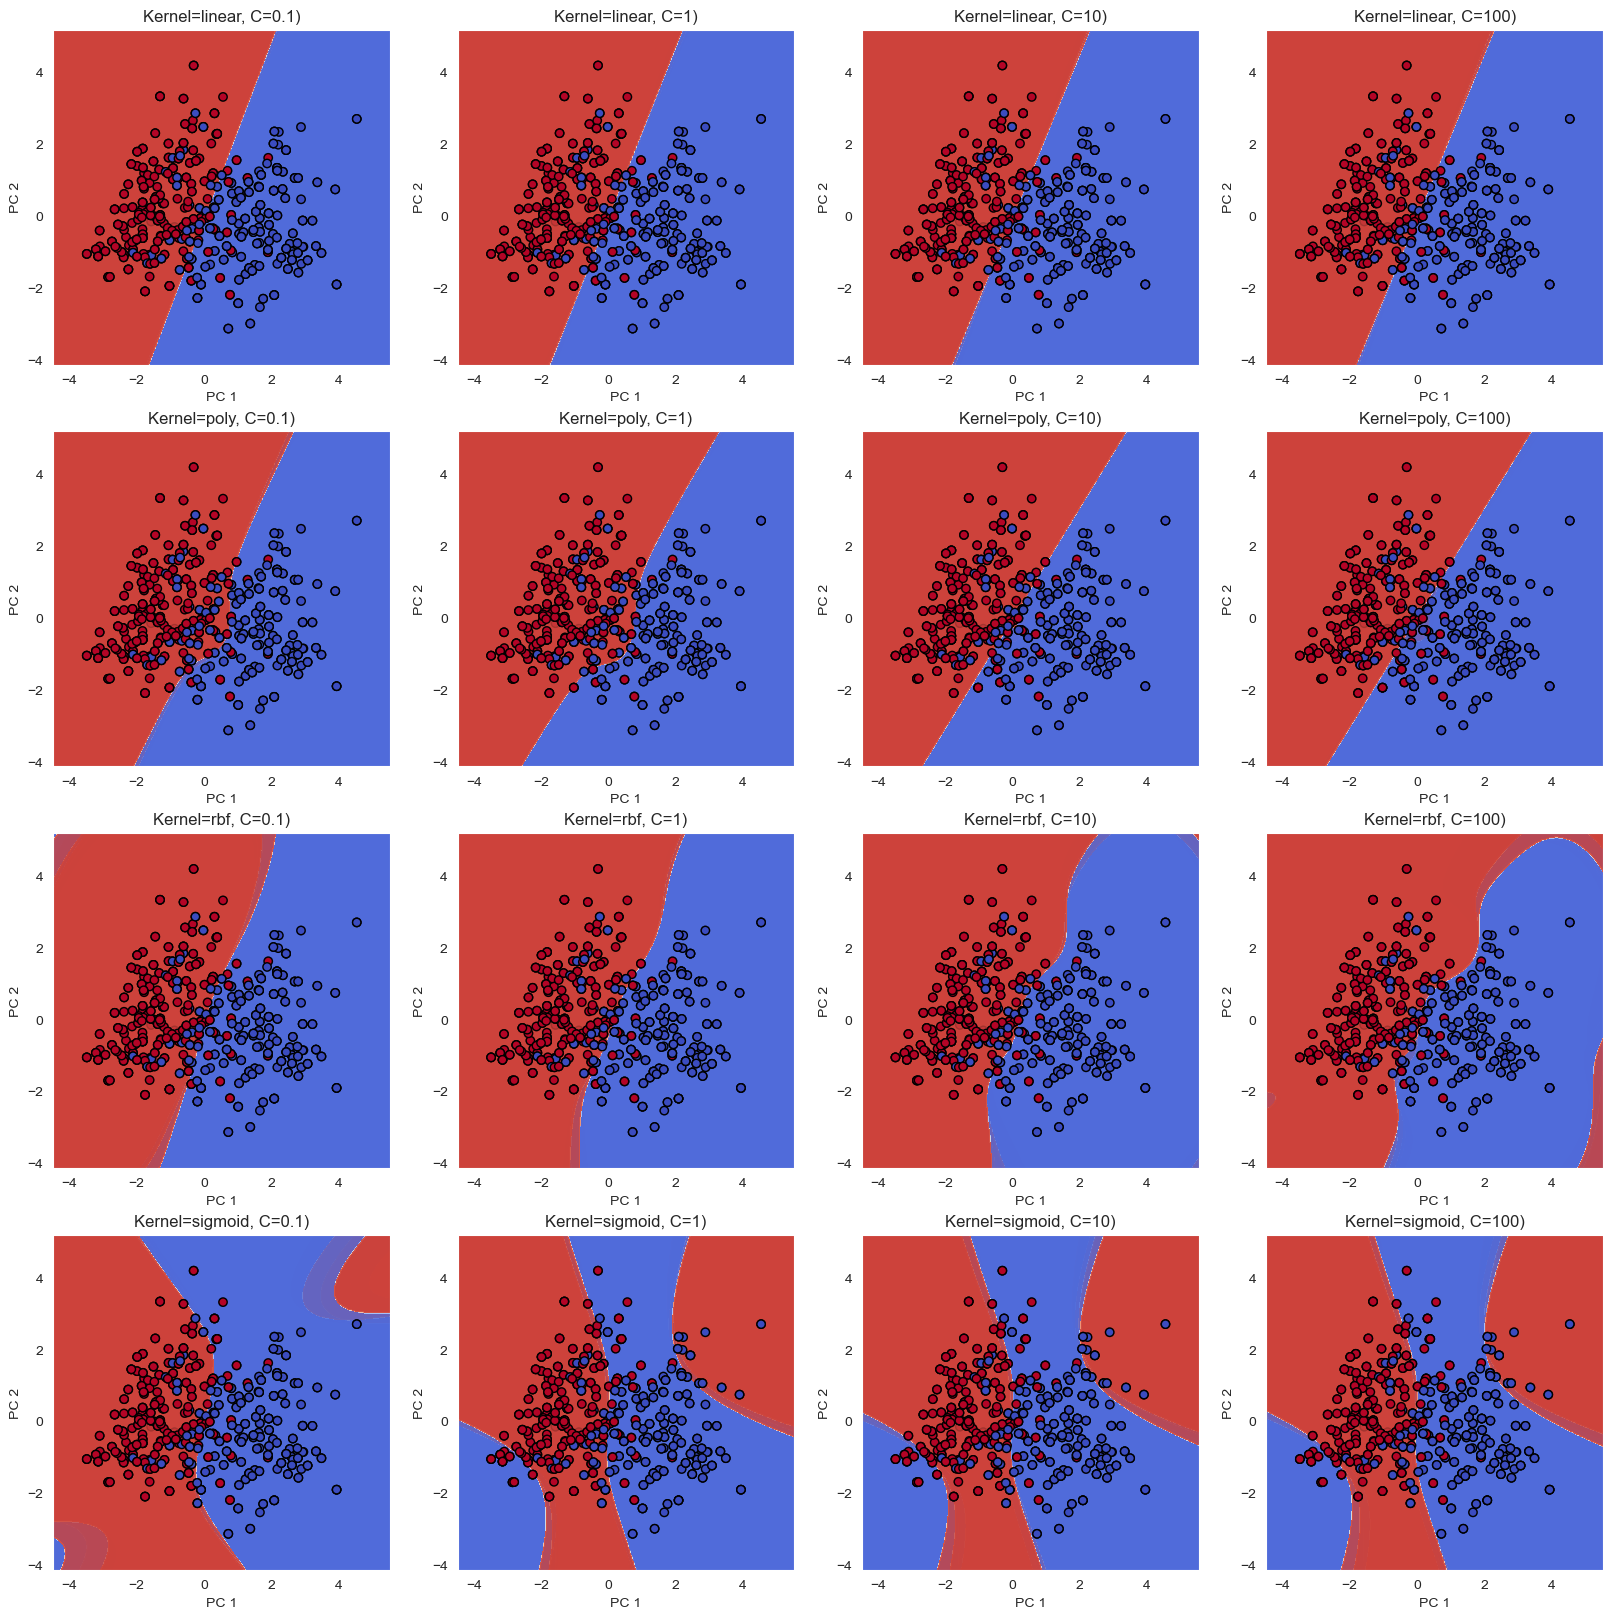

In [40]:
_, ax = plt.subplots(4, 4, figsize=(20,20))
C = [0.1, 1, 10, 100]
Kernel = ['linear', 'poly', 'rbf', 'sigmoid']
i = 0
for kernel in Kernel:
    j = 0
    for c in C:
        for train, validation in kfolds.split(X, Y):
            X_pca = X.iloc[train].iloc[:, :2]
            #X_pca.columns = ["PC 1", "PC 2"]
            
            svc_model = SVC(C=c, kernel=kernel)
            svc_model.fit(X_pca, Y.iloc[train])

            h = .02  # tamaño de paso en la malla
            x_min, x_max = X_pca.iloc[:, 0].min() - 1, X_pca.iloc[:, 0].max() + 1
            y_min, y_max = X_pca.iloc[:, 1].min() - 1, X_pca.iloc[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Visualizar la frontera de decisión y los puntos de datos en la subgráfica actual
            ax[i,j].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
            ax[i,j].scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=Y.iloc[train], cmap=plt.cm.coolwarm, edgecolors='k')
            ax[i,j].set_title(f'Kernel={kernel}, C={c}')
            ax[i,j].set_xlabel('PC 1')
            ax[i,j].set_ylabel('PC 2')
            
        j += 1
    i += 1

plt.show()

## ROC curves

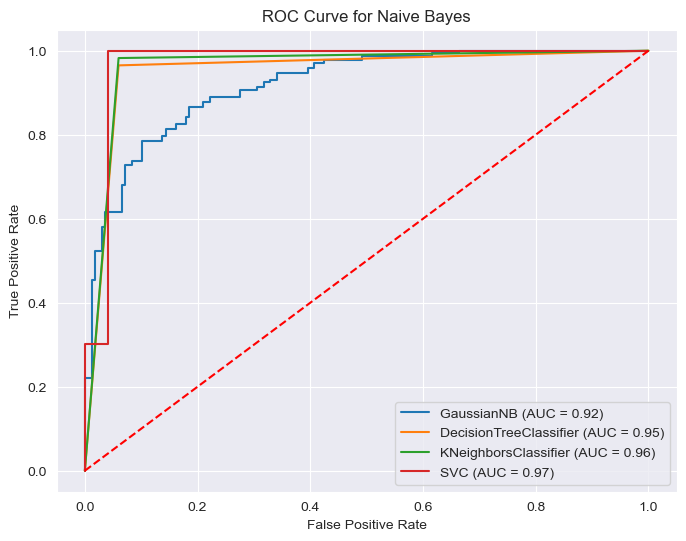

In [82]:
test_df = pd.read_csv("df_test.csv")
X_Test, Y_Test = test_df.drop(["target"], axis = 1), test_df["target"]
training_df = pd.read_csv("df_train.csv")
X, Y = training_df.drop(["target"], axis = 1), training_df["target"]

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X, Y)

decision_tree_model = DecisionTreeClassifier(criterion='log_loss', max_depth=19)
decision_tree_model.fit(X, Y)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X, Y)

svc_model = SVC(C=100, kernel='poly', degree=5)
svc_model.fit(X, Y)

_, ax = plt.subplots(figsize=(8,6))

RocCurveDisplay.from_estimator(naive_bayes_model, X_Test, Y_Test, ax=ax)
RocCurveDisplay.from_estimator(decision_tree_model, X_Test, Y_Test, ax=ax)
RocCurveDisplay.from_estimator(knn_model, X_Test, Y_Test, ax=ax)
RocCurveDisplay.from_estimator(svc_model, X_Test, Y_Test, ax=ax)

plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()